In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, "../../scrapemed")

import scrapemed.paper as paper
import scrapemed.scrape as scrape
from scrapemed.paperSet import paperSet
import pandas as pd
import lxml
from dotenv import load_dotenv
import os
load_dotenv()

True

In [2]:
EMAIL = os.getenv("PMC_EMAIL")
pset = paperSet.from_search(EMAIL, term = "brain[ti] AND surgery[ti]", retmax = 11)

Generating paperSet from search (This can take a while due to PMC HTTP Request Limitations!)...
Done generating paperSet!


In [3]:
pset[0].title

'Perioperative brain injury marker concentrations in neonatal open-heart surgery: a prospective observational study'

In [4]:
pset.add_pmcids(pmcids= [7067710, 7067711], email = EMAIL)

2

In [5]:
pset.df

,PMCID,Last_Updated,Title,Authors,Non_Author_Contributors,Abstract,Body,Journal_ID,Journal_Title,ISSN,...,License,Funding,Footnote,Acknowledgements,Notes,Custom_Meta,Ref_Map,Citations,Tables,Figures
0,10445649,"(9, 5, 2023)",Perioperative brain injury marker concentratio...,"[Åsa Jungner, Finn Lennartsson, Isabella Björk...",None,\nNeonates with critical congenital heart defe...,\nSECTION: Introduction:\n\nNeonates with crit...,"{'nlm-ta': 'Front Pediatr', 'iso-abbrev': 'Fro...",Frontiers in Pediatrics,{'epub': '2296-2360'},...,Not Specified,None,None,[Acknowledgments \n The authors wish to ...,[],{'section-at-acceptance': 'Pediatric Critical ...,"{0: {'Authors': ['R Liamlahi', 'B Latal'], 'Ti...","[Authors: ['R Liamlahi', 'B Latal']; Title: No...","[<style type=""text/css"">\n</style>\n<table id=...","[{'Label': 'Figure 1', 'Caption': ' ..."
1,9889004,"(9, 5, 2023)",Surgery of the Brain,None,None,,,"{'nlm-ta': 'Chic Med J Exam', 'pmc': 'chicmedj...",The Chicago Medical Journal and Examiner,{},...,Not Specified,None,None,[],[],None,{},[],[],[]
2,9888923,"(9, 5, 2023)",Brain Surgery,None,None,,,"{'nlm-ta': 'Chic Med J Exam', 'pmc': 'chicmedj...",The Chicago Medical Journal and Examiner,{},...,Not Specified,None,None,[],[],None,{},[],[],[]
3,10423256,"(9, 5, 2023)",A 3-month survival model after Gamma Knife sur...,"[Hangeul Park, Hyun-Tai Chung, Jin-Wook Kim, Y...",None,\nGamma Knife surgery (GKS) for brain metastas...,\nSECTION: Introduction:\n\nStereotactic radio...,"{'nlm-ta': 'Sci Rep', 'iso-abbrev': 'Sci Rep'}",Scientific Reports,{'epub': '2045-2322'},...,Not Specified,[Technology Planning & Evaluation],Publisher's note - Springer Nature remains neu...,[Acknowledgements \n The authors appreci...,[Title: Author contributions\nE.J.L. contribut...,{'issue-copyright-statement': '© Springer Natu...,"{0: {'Authors': ['G Bowden'], 'Title': 'Gamma ...",[Authors: ['G Bowden']; Title: Gamma knife rad...,"[<style type=""text/css"">\n</style>\n<table id=...","[{'Label': 'Figure 1', 'Caption': 'Kaplan‒Meie..."
4,10417431,"(9, 5, 2023)",Surgery vs. Radiosurgery for Patients with Loc...,"[Giorgio Fiore, Leonardo Tariciotti, Giulio An...",[Axel H. Schönthal],\nSECTION: Simple Summary:\n\nWith an incidenc...,\nSECTION: 1. Introduction:\n\nWith an inciden...,"{'nlm-ta': 'Cancers (Basel)', 'iso-abbrev': 'C...",Cancers,{'epub': '2072-6694'},...,Not Specified,None,"Disclaimer/Publisher’s Note: The statements, o...",[],[Title: Author Contributions\nConceptualizatio...,None,"{0: {'Authors': ['L. Nayak', 'E.Q. Lee', 'P.Y....","[Authors: ['L. Nayak', 'E.Q. Lee', 'P.Y. Wen']...",[],"[{'Label': 'Figure 1', 'Caption': ' Fl..."
5,10414059,"(9, 5, 2023)",Feasibility of comparing medical management an...,"[James J M Loan, Andrew Bacon, Janneke van Bei...","[Ioannis Fouyas, Allan MacRaild, Jessica Teasd...",\nSECTION: Introduction:\n\nThe top research p...,\nSECTION: Introduction:\n\nSymptomatic brain ...,"{'nlm-ta': 'BMJ Open', 'iso-abbrev': 'BMJ Open...",BMJ Open,{'epub': '2044-6055'},...,Not Specified,None,"Twitter: @James_JM_Loan, @bullen_ali, @Bleedin...","[We thank all members of the Patient, carer an...",[],{'special-feature': 'unlocked'},"{0: ' ', 1: ' ', 2: ' ', 4: {'Label': 'Figure ...",[],"[<style type=""text/css"">\n</style>\n<table id=...","[{'Label': 'Figure 1', 'Caption': ' ..."
6,10410636,"(9, 5, 2023)",Comparison of peripheral blood saturation with...,"[Bartosz Kubisa, Anna Lesińska, Krzysztof Safr...",None,\nSECTION: Introduction:\n\nNear-infrared spec...,\nSECTION: Introduction:\n\nDuring thoracic su...,"{'nlm-ta': 'Kardiochir Torakochirurgia Pol', '...",Kardiochirurgia i Torakochirurgia Polska = Pol...,"{'ppub': '1731-5530', 'epub': '1897-4252'}",...,Not Specified,None,None,[],[],None,"{0: '. ', 1: '. ', 2: '. ', 3: '. ', 4: <panda...",[],"[<style type=""text/css"">\n</style>\n<table id=...","[{'Label': 'Figure 1', 'Caption': ' ..."
7,10406254,"(9, 5, 2023)",White matter tract changes in pediatric poster...,"[Jeffrey Tanedo, Niharika G

In [6]:
pset.df.columns

Index(['PMCID', 'Last_Updated', 'Title', 'Authors', 'Non_Author_Contributors',
       'Abstract', 'Body', 'Journal_ID', 'Journal_Title', 'ISSN',
       'Publisher_Name', 'Publisher_Location', 'Article_ID', 'Article_Types',
       'Article_Categories', 'Published_Date', 'Volume', 'Issue', 'First_Page',
       'Last_Page', 'Copyright', 'License', 'Funding', 'Footnote',
       'Acknowledgements', 'Notes', 'Custom_Meta', 'Ref_Map', 'Citations',
       'Tables', 'Figures'],
      dtype='object')

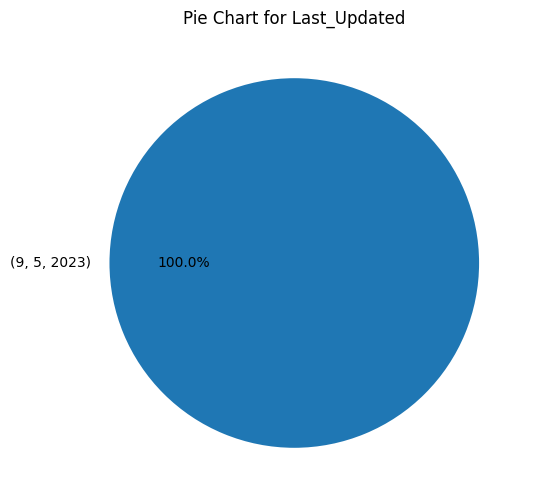

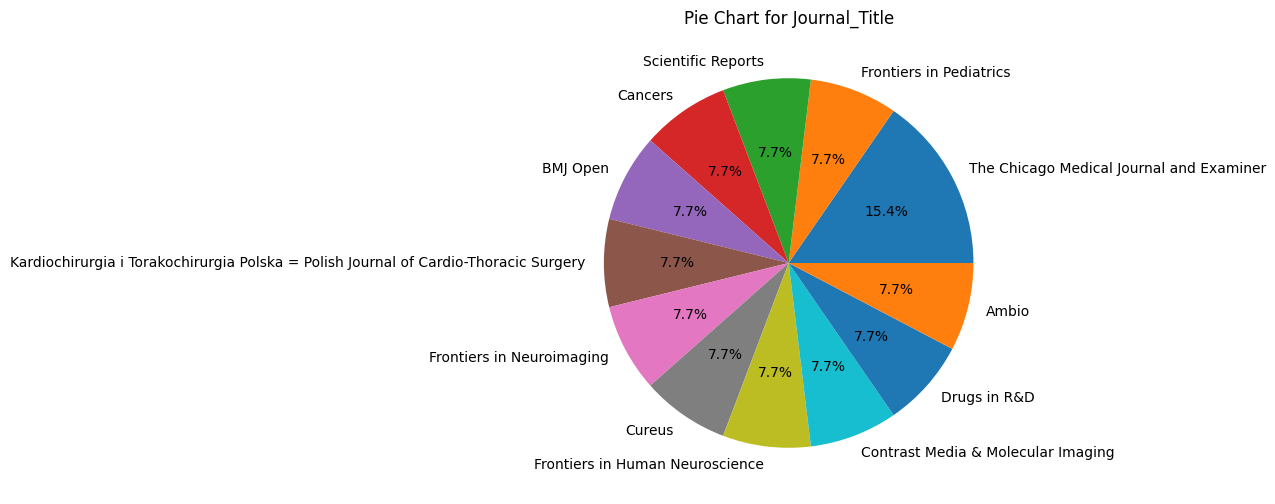

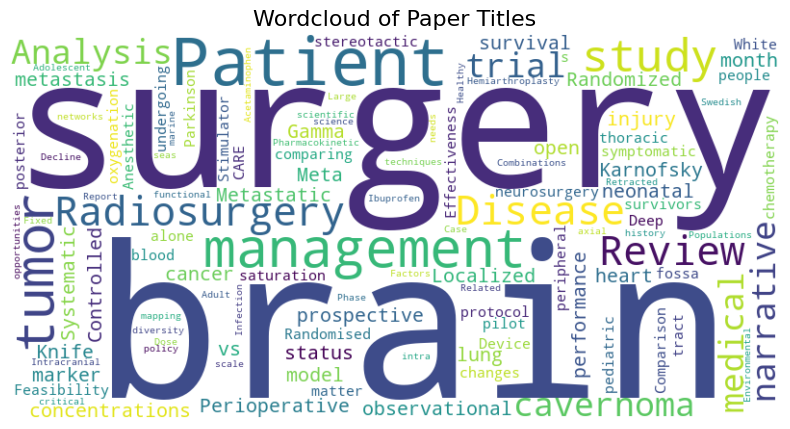

In [7]:
pset.visualize()

In [8]:
pset2 = paperSet.from_pmcid_list([7067710, 7067711], EMAIL)

Generating paperSet from PMCID list (This can take a while due to PMC HTTP Request Limitations!)...
Done generating paperSet!


In [9]:
pset2.df

,PMCID,Last_Updated,Title,Authors,Non_Author_Contributors,Abstract,Body,Journal_ID,Journal_Title,ISSN,...,License,Funding,Footnote,Acknowledgements,Notes,Custom_Meta,Ref_Map,Citations,Tables,Figures
0,7067710,"(9, 5, 2023)",Phase I Pharmacokinetic Study of Fixed-Dose Co...,"[Sanela Tarabar, Debra Kelsh, Bradley Vince, R...",None,\nSECTION: Introduction:\n\nA fixed-dose combi...,\nSECTION: Key Points:\n\n\n\nSECTION: Introdu...,"{'nlm-ta': 'Drugs R D', 'iso-abbrev': 'Drugs R...",Drugs in R&D,"{'ppub': '1174-5886', 'epub': '1179-6901'}",...,OpenAccess,[Pfizer Consumer Healthcare],"The authors David E. Kellstein, Suzanne Meeves...",[Acknowledgements \n Medical writing sup...,[Title: Author Contributions\nStudy design: Al...,{'issue-copyright-statement': '© The Author(s)...,{0: ...,[Authors: ['A Dickman']; Title: Choosing over-...,"[<table border=""1"" class=""dataframe"">\n <thea...","[{'Label': 'Fig. 1', 'Caption': 'Median plasma..."
1,7067711,"(9, 5, 2023)",Decline and diversity in Swedish seas: Environ...,"[Susanna Lidström, Sverker Sörlin, Henrik Sved...",None,"\nBefore the mid-twentieth century, there was ...",\nSECTION: Introduction: A narrative of declin...,"{'nlm-ta': 'Ambio', 'iso-abbrev': 'Ambio'}",Ambio,"{'ppub': '0044-7447', 'epub': '1654-7209'}",...,OpenAccess,"[The Swedish Research Council, European Resear...",Publisher's Note - Springer Nature remains neu...,[Acknowledgements \n Open access funding...,[],{'issue-copyright-statement': '© Royal Swedish...,"{0: 'Awebro, K. 2008. Ett bottennapp för Sveri...","[Authors: ['E Hagen', 'R Feistel']; Title: Cli...",[],[]


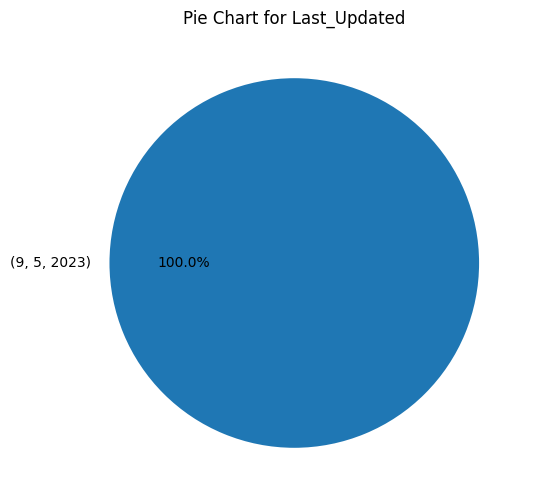

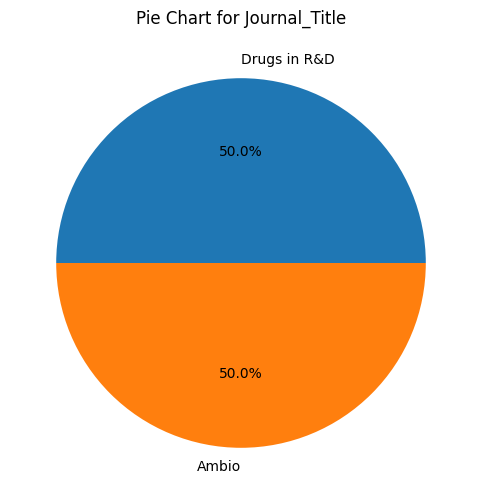

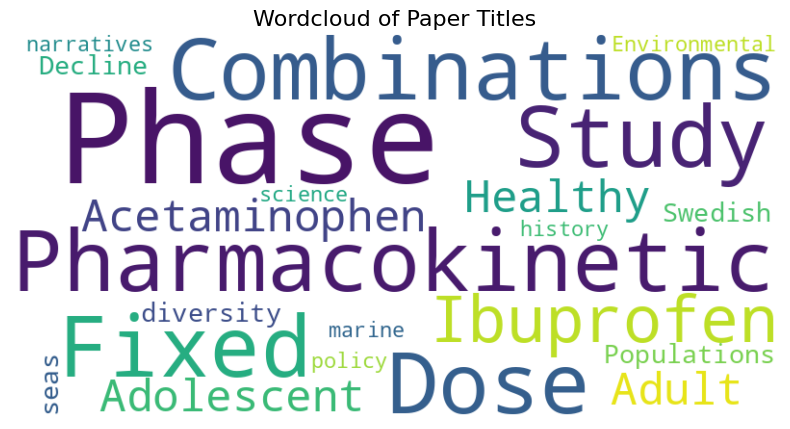

In [10]:
pset2.visualize()